In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [1]:
!pip install sklearn

In [5]:
df = pd.read_csv('ford.csv')

In [6]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,B-MAX,2014,7498,Semi-Auto,33023,Petrol,160,44.1,1.6
1,B-MAX,2014,6995,Semi-Auto,50800,Petrol,160,44.1,1.6
2,B-MAX,2013,5995,Manual,42996,Diesel,20,70.6,1.6
3,B-MAX,2017,7998,Manual,41294,Diesel,0,74.4,1.5
4,B-MAX,2013,5698,Manual,44901,Petrol,145,47.1,1.4


In [7]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [8]:
df.duplicated().sum()

154

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [2]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [20]:
df['model_num'] = enc.fit(df['model']).transform(df['model'])
df['transmission_num'] = enc.fit(df['transmission']).transform(df['transmission'])
df['fuel_num'] = enc.fit(df['fuelType']).transform(df['fuelType'])

In [21]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_num,transmission_num,fuel_num
0,B-MAX,2014,7498,Semi-Auto,33023,Petrol,160,44.1,1.6,0,2,4
1,B-MAX,2014,6995,Semi-Auto,50800,Petrol,160,44.1,1.6,0,2,4
2,B-MAX,2013,5995,Manual,42996,Diesel,20,70.6,1.6,0,1,0
3,B-MAX,2017,7998,Manual,41294,Diesel,0,74.4,1.5,0,1,0
4,B-MAX,2013,5698,Manual,44901,Petrol,145,47.1,1.4,0,1,4


<AxesSubplot:>

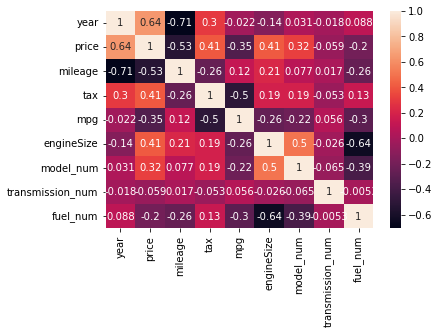

In [22]:
corr = df.corr() # allows us to get the correlations
sns.heatmap(corr, annot=True) # annot=True adds the values

In [23]:
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize', "model_num", 'transmission_num', 'fuel_num']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [33]:
lr = linear_model.LinearRegression() 
lr.fit(x_train, y_train)

LinearRegression()

In [30]:
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Coefficients: 
 [ 1.13927292e+03 -6.51480867e-02  1.27407046e+00 -1.05518109e+02
  4.18082954e+03  3.26320109e+01 -2.71892665e+02 -3.28569383e+02]
Intercept: 
 -2282717.1591151915


In [38]:
y_pred = lr.predict(x_test)

In [40]:
lr_diff = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred})
lr_diff.head()

,Actual Value,Predicted Value
12532,15970,17731.733822
13512,19499,16856.963324
7454,8100,11950.005303
9668,10178,12292.487596
10397,8750,9382.359381


In [45]:
print('R Squared: {:.2f}'.format(lr.score(X,y)*100))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

R Squared: 73.43
Mean Squared Error:  5452005.56867708
